# 1. Install the **package**

In [ ]:
if(!require(remotes)) install.packages("remotes")
if (!requireNamespace("kimindex", quietly = TRUE)) {
  remotes::install_github("agronomy4future/kimindex")
}
library(remotes)
library(kimindex)

# 2. Upload dataset

In [5]:
if(!require(readr)) install.packages("readr")
library(readr)
github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/main/Philipp_et_al_2018.csv"
df = data.frame(read_csv(url(github), show_col_types=FALSE))

head(df,5)

,grain_weight_mg,grain_area_mm2
,<dbl>,<dbl>
1,49.08,18.6
2,45.43,18.3
3,41.78,16.7
4,53.42,20.3
5,44.40,17.5


# 3. Predict grain weight from area in bread wheat

In [7]:
predicted_gw= kimindex(df, "grain_area_mm2", remove_na= TRUE)

head(predicted_gw,5)

,grain_weight_mg,grain_area_mm2,predicted_gw
,<dbl>,<dbl>,<dbl>
1,49.08,18.6,47.39768
2,45.43,18.3,46.39118
3,41.78,16.7,41.11362
4,53.42,20.3,53.19793
5,44.40,17.5,43.73310


# 4. Fitting actual grain weight with predicted grain weight

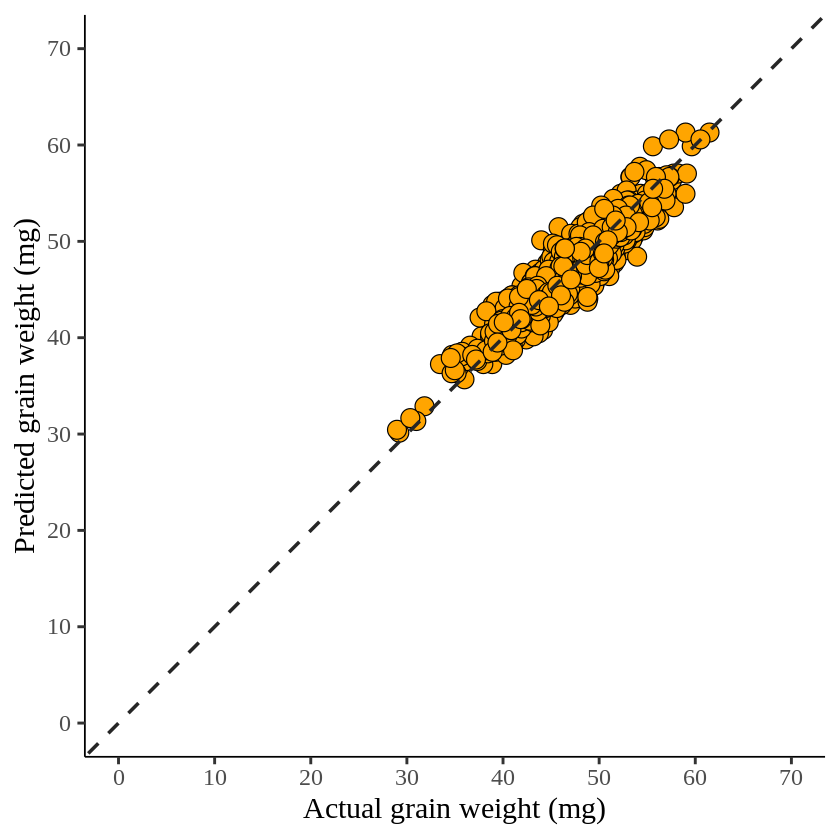

In [9]:
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

ggplot(data=predicted_gw, aes(x=grain_weight_mg, y=predicted_gw))+
  geom_point(fill= "orange", color= "black", size= 5, shape= 21) +
  scale_x_continuous(breaks=seq(0,70,10), limits = c(0,70)) +
  scale_y_continuous(breaks=seq(0,70,10), limits = c(0,70)) +
  geom_abline (slope=1, linetype= "dashed", color="grey15", size=1) +
  labs(x="Actual grain weight (mg)", y="Predicted grain weight (mg)") +
  theme_classic(base_size=18, base_family="serif")+
  theme(legend.position=c(0.8,0.8),
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain",
                                 size=13, color= "Black"),
        legend.background=element_rect(fill="white"),
        axis.line=element_line(linewidth=0.5, colour="black"))